<a href="https://colab.research.google.com/github/khushishah03/Mini-project-Smartknower/blob/master/Image_classification_using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Description: this program classifies images

In [ ]:
#importing libraries
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#load the data
from keras.datasets import cifar10
(x_train,y_train),(x_test, y_test)=cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
#look at the the datatypes of variables
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
#get the shape of the array
print('x_train shape:',x_train.shape)
print('y_train shape:',y_train.shape)
print('x_test shape:',x_test.shape)
print('y_test shape:',y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [ ]:
#take a look at the first image as an array
index=10
x_train[index]

array([[[53, 65, 53],
        [54, 63, 52],
        [56, 60, 50],
        ...,
        [47, 51, 50],
        [41, 45, 44],
        [24, 28, 27]],

       [[46, 59, 41],
        [53, 62, 45],
        [54, 59, 44],
        ...,
        [42, 46, 45],
        [39, 43, 42],
        [28, 32, 31]],

       [[45, 59, 38],
        [50, 60, 41],
        [46, 52, 34],
        ...,
        [38, 42, 41],
        [36, 40, 39],
        [29, 33, 32]],

       ...,

       [[71, 83, 66],
        [74, 83, 66],
        [80, 85, 67],
        ...,
        [51, 54, 33],
        [46, 49, 34],
        [49, 50, 41]],

       [[75, 82, 67],
        [79, 85, 69],
        [81, 85, 67],
        ...,
        [61, 65, 41],
        [64, 67, 48],
        [48, 50, 41]],

       [[85, 83, 71],
        [85, 84, 71],
        [86, 86, 70],
        ...,
        [61, 65, 39],
        [64, 67, 46],
        [49, 50, 41]]], dtype=uint8)

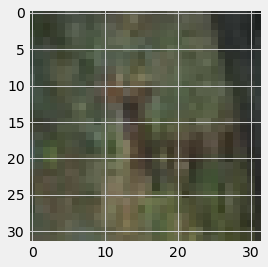

In [ ]:
#show the image as picture
img=plt.imshow(x_train[index])

In [ ]:
#get the image label
print('the image label is:',y_train[index])

the image label is: [4]


In [ ]:
#get the image classification
classification=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
#print the image class
print('The image class is:',classification[y_train[index][0]])

The image class is: deer


In [ ]:
#convert the labels into the set of 10 numbers to input into neural network
y_train_one_hot=to_categorical(y_train)
y_test_one_hot=to_categorical(y_test)

In [ ]:
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [ ]:
#print the new label of the image above
print('the one hot label is:',y_train_one_hot[index])

the one hot label is: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [ ]:
#normalize the pixels to be values between 0 and 1
x_train=x_train/255
x_test=x_test/255

In [ ]:
x_train[index]

array([[[0.20784314, 0.25490196, 0.20784314],
        [0.21176471, 0.24705882, 0.20392157],
        [0.21960784, 0.23529412, 0.19607843],
        ...,
        [0.18431373, 0.2       , 0.19607843],
        [0.16078431, 0.17647059, 0.17254902],
        [0.09411765, 0.10980392, 0.10588235]],

       [[0.18039216, 0.23137255, 0.16078431],
        [0.20784314, 0.24313725, 0.17647059],
        [0.21176471, 0.23137255, 0.17254902],
        ...,
        [0.16470588, 0.18039216, 0.17647059],
        [0.15294118, 0.16862745, 0.16470588],
        [0.10980392, 0.1254902 , 0.12156863]],

       [[0.17647059, 0.23137255, 0.14901961],
        [0.19607843, 0.23529412, 0.16078431],
        [0.18039216, 0.20392157, 0.13333333],
        ...,
        [0.14901961, 0.16470588, 0.16078431],
        [0.14117647, 0.15686275, 0.15294118],
        [0.11372549, 0.12941176, 0.1254902 ]],

       ...,

       [[0.27843137, 0.3254902 , 0.25882353],
        [0.29019608, 0.3254902 , 0.25882353],
        [0.31372549, 0

In [ ]:
#create the models architecture
model= Sequential()

#add the first layer
model.add(Conv2D(32,(5,5),activation='relu',input_shape=(32,32,3)) )

#add a pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

#add another convolution layer
model.add(Conv2D(32,(5,5),activation='relu') )

#add another pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

#add a flattening layer
model.add(Flatten())

#add a layer with 1000 neurons
model.add(Dense(1000, activation='relu'))

#add a dropout layer
model.add(Dropout(0.5))

#add a layer with 500 neurons
model.add(Dense(500, activation='relu'))

#add a dropout layer
model.add(Dropout(0.5))

#add a layer with 250 neurons
model.add(Dense(250, activation='relu'))

#add a layer with 10 neurons
model.add(Dense(10, activation='softmax'))

In [ ]:
#compile the model
model.compile(loss= 'categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
#train the model
hist=model.fit(x_train,y_train_one_hot,
               batch_size=256,
               epochs=10,
               validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 56s 357ms/step - loss: 1.8202 - accuracy: 0.3234 - val_loss: 1.5255 - val_accuracy: 0.4397
Epoch 2/10
157/157 [==============================] - 56s 354ms/step - loss: 1.4398 - accuracy: 0.4752 - val_loss: 1.3022 - val_accuracy: 0.5294
Epoch 3/10
157/157 [==============================] - 55s 353ms/step - loss: 1.3073 - accuracy: 0.5305 - val_loss: 1.2761 - val_accuracy: 0.5502
Epoch 4/10
157/157 [==============================] - 55s 350ms/step - loss: 1.1937 - accuracy: 0.5748 - val_loss: 1.1367 - val_accuracy: 0.5936
Epoch 5/10
157/157 [==============================] - 56s 355ms/step - loss: 1.1066 - accuracy: 0.6078 - val_loss: 1.1112 - val_accuracy: 0.6017
Epoch 6/10
157/157 [==============================] - 56s 355ms/step - loss: 1.0301 - accuracy: 0.6394 - val_loss: 1.0365 - val_accuracy: 0.6346
Epoch 7/10
157/157 [==============================] - 56s 354ms/step - loss: 0.9644 - accuracy: 0.6593 - val_loss: 0.9712 - val_ac

In [ ]:
#evaluate the model using test data set
model.evaluate(x_test,y_test_one_hot)[1]

313/313 [==============================] - 5s 16ms/step - loss: 0.9648 - accuracy: 0.6677


0.6676999926567078

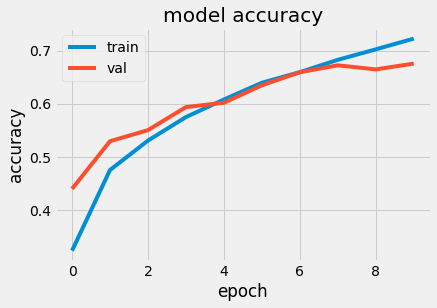

In [ ]:
#visualize the models accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='upper left')
plt.show()

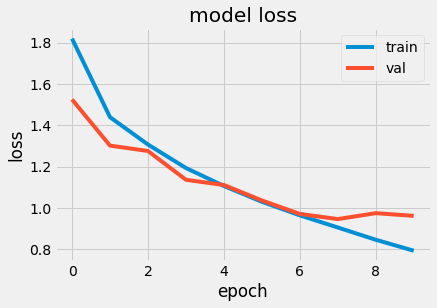

In [ ]:
#visualize the models loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='upper right')
plt.show()

In [ ]:
#test the model with an example
from google.colab import files
uploaded= files.upload()

Saving airplane2.jpg to airplane2.jpg


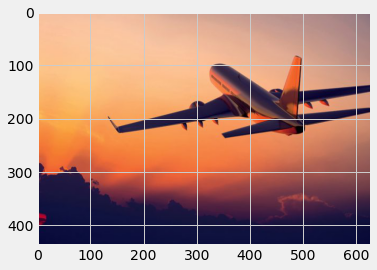

In [ ]:
#show the image
new_image =plt.imread('airplane2.jpg')
img =plt.imshow(new_image)

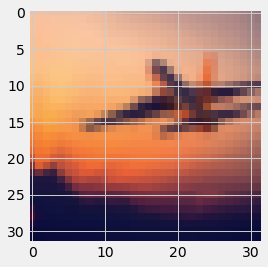

In [ ]:
#resize the image
from skimage.transform import resize
resized_image=resize(new_image,(32,32,3))
img=plt.imshow(resized_image)

In [ ]:
#get the predictions
predictions= model.predict(np.array([resized_image]))
#show the predictions
predictions

array([[2.2917147e-01, 1.9814591e-03, 3.4781976e-03, 3.3917783e-03,
        5.7539024e-04, 1.0780637e-03, 9.5117517e-05, 1.7124206e-04,
        7.5712466e-01, 2.9326477e-03]], dtype=float32)

In [ ]:
#sort the predictions from to least to greatest
list_index=[0,1,2,3,4,5,6,7,8,9]
x=predictions

for i in range(10):
  for j in range(10):
    if x[0][list_index[i]]>x[0][list_index[j]]:
      temp=list_index[i]
      list_index[i]=list_index[j]
      list_index[j]=temp
#show the srted labels in order
print(list_index) 

[8, 0, 2, 3, 9, 1, 5, 4, 7, 6]


In [ ]:
#print the first 5 predictions
for i in range(5):
  print(classification[list_index[i]], ':', round(predictions[0][list_index[i]]*100,2),'%' )

ship : 75.71 %
airplane : 22.92 %
bird : 0.35 %
cat : 0.34 %
truck : 0.29 %
